In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from my_toolbox import data_describe as dd

path = '../data/'
data_name = ["train", 'test', 'sample_submission']

## 資料寫入

In [2]:
df = pd.read_csv("{}{}.csv".format(path,data_name[0]), encoding='utf8')
print(df.shape)
# df.info()

(1460, 81)


In [3]:
df_test = pd.read_csv("{}{}.csv".format(path,data_name[1]), encoding='utf8')
print(df_test.shape)
# df_test.info()

(1459, 80)


In [4]:
df_submission = pd.read_csv("{}{}.csv".format(path,data_name[2]), encoding='utf8')
print(df_submission.shape)
# df_submission.info()

(1459, 2)


In [5]:
# to see how was our data look like
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## 資料簡述

In [8]:
data_describe1 =dd.data_describe(df);
data_describe2 = dd.data_describe(df_test);
data_describe1[data_describe1.is_null==True]

,duplicate,is_null,null_number,null_rate(%)
LotFrontage,111,True,259,17.74
Alley,3,True,1369,93.77
MasVnrType,5,True,8,0.55
MasVnrArea,328,True,8,0.55
BsmtQual,5,True,37,2.53
BsmtCond,5,True,37,2.53
BsmtExposure,5,True,38,2.60
BsmtFinType1,7,True,37,2.53
BsmtFinType2,7,True,38,2.60
Electrical,6,True,1,0.07


In [9]:
# define the types of columns

category = ['MSSubClass', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Condition1', 'Condition2',
            'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'PavedDrive', 'MoSold', 'SaleCondition',
            'YrSold', 'Electrical', 'MSZoning', 'MasVnrType', 'Functional', 'Exterior1st', 'Exterior2nd', 'SaleType',
            'GarageType','BldgType']

numeric = ['SalePrice','LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces',
       'GarageCars', 'GarageArea']

category_with_order = ['BsmtCond','LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 
                       'ExterQual', 'ExterCond', 'CentralAir', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'KitchenQual', 'Utilities']

data_type_dict = {'category':category, 'category_with_order':category_with_order}

# set the default type as numeric because df_test doesn't have column 'SalePrice'
default_type = 'numeric'

dd.data_type(data_describe1, default_type, data_type_dict)
dd.data_type(data_describe2, default_type, data_type_dict)

# data_describe1;
# data_describe2;

In [10]:
print('有空值欄位總數:', df.isnull().any().sum())

# columns have null numbers
data_describe1[data_describe1["is_null"]==True]

有空值欄位總數: 19


,duplicate,is_null,null_number,null_rate(%),type
LotFrontage,111,True,259,17.74,numeric
Alley,3,True,1369,93.77,numeric
MasVnrType,5,True,8,0.55,category
MasVnrArea,328,True,8,0.55,numeric
BsmtQual,5,True,37,2.53,category_with_order
BsmtCond,5,True,37,2.53,category_with_order
BsmtExposure,5,True,38,2.60,category_with_order
BsmtFinType1,7,True,37,2.53,category_with_order
BsmtFinType2,7,True,38,2.60,category_with_order
Electrical,6,True,1,0.07,category


In [11]:
print('有空值欄位總數:', df_test.isnull().any().sum())

# columns have null numbers
data_describe2[data_describe2["is_null"]==True]

有空值欄位總數: 33


,duplicate,is_null,null_number,null_rate(%),type
MSZoning,6,True,4,0.27,category
LotFrontage,116,True,227,15.56,numeric
Alley,3,True,1352,92.67,numeric
Utilities,2,True,2,0.14,category_with_order
Exterior1st,14,True,1,0.07,category
Exterior2nd,16,True,1,0.07,category
MasVnrType,5,True,16,1.10,category
MasVnrArea,304,True,15,1.03,numeric
BsmtQual,5,True,44,3.02,category_with_order
BsmtCond,5,True,45,3.08,category_with_order


In [12]:
# train 有空值欄位:
data_describe1[data_describe1["is_null"]==True].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [13]:
# test 有空值欄位:
data_describe2[data_describe2["is_null"]==True].index

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

## 重複值檢查

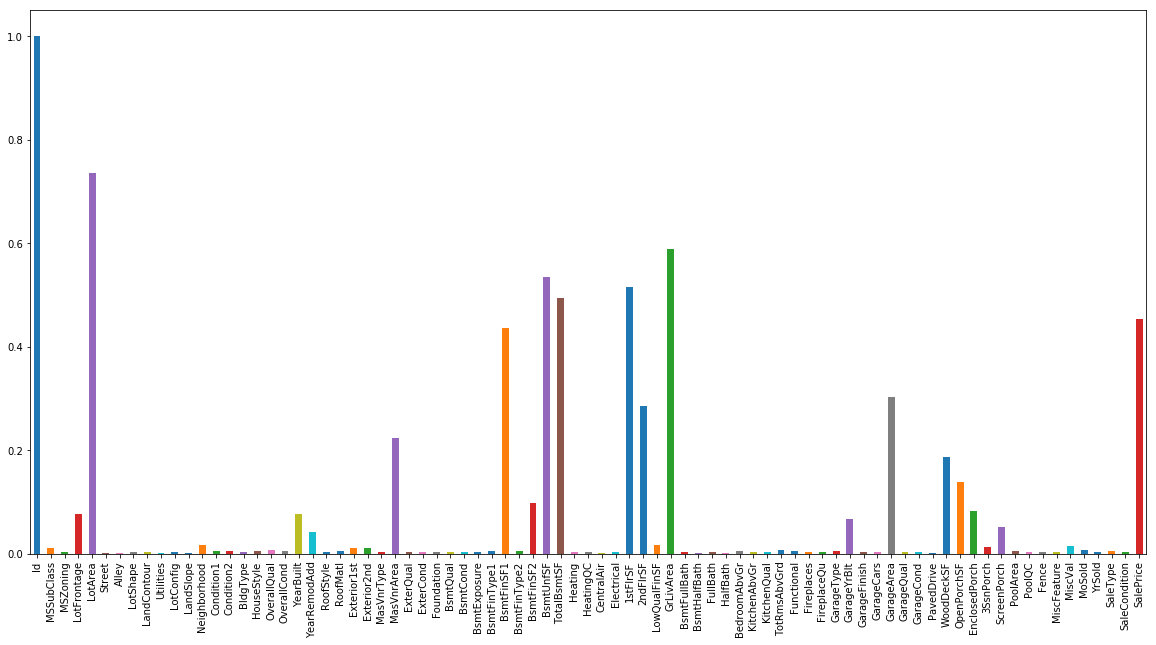

In [14]:
# duplicate number rate
dup_num = df.apply(lambda x:x.unique().shape[0], axis=0)
plt.figure(figsize=(20,10))
(dup_num/df.shape[0]).plot(kind='bar')

## 數據空值散布狀態

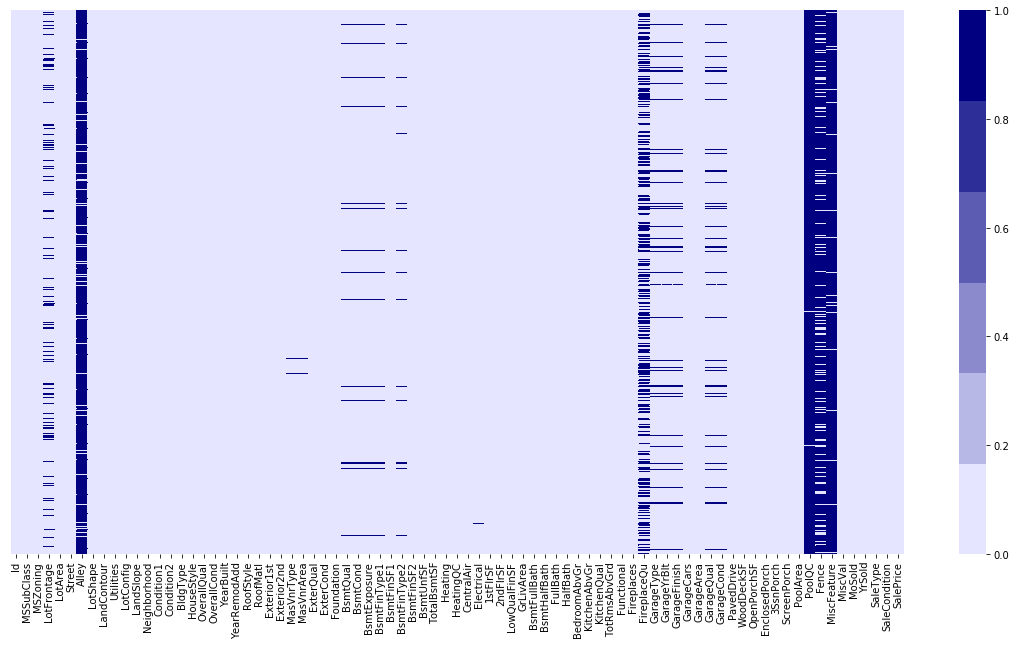

In [15]:
plt.figure(figsize=(20,10))
cmap=sns.light_palette("navy", reverse=False)
sns.heatmap(df.isnull().astype(np.int8),yticklabels=False,cmap=cmap)

## 數值型資料存在空值欄位

In [16]:
# train
numeric_type = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'HalfBath', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice']

data_describe1.loc[numeric_type,:][data_describe1.loc[numeric_type,'is_null']==True]

,duplicate,is_null,null_number,null_rate(%),type
LotFrontage,111,True,259,17.74,numeric
MasVnrArea,328,True,8,0.55,numeric
GarageYrBlt,98,True,81,5.55,numeric


In [17]:
# GarageType

In [18]:
# test
data_describe2.loc[numeric_type,:][data_describe1.loc[numeric_type,'is_null']==True]

c:\users\student\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,duplicate,is_null,null_number,null_rate(%),type
LotFrontage,116.0,True,227.0,15.56,numeric
MasVnrArea,304.0,True,15.0,1.03,numeric
GarageYrBlt,98.0,True,78.0,5.35,numeric


---
## 數值形數據相關性
數值型欄位排除類別型: 
correlation between int/float columns
* 類別: 'Id', 'MSSubClass',
* 是非: 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath'
* 程度: 'OverallQual', 'OverallCond',
* 離散(如:房間數): 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'BedroomAbvGr',	'KitchenAbvGr',  'Fireplaces'
* 時間: 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'
* 是否需攤平? 'BsmtFinSF1', 'BsmtFinSF2'(暫時保留)

In [19]:
df2 = df.drop(columns = ['Id', 'MSSubClass',
                         'BsmtFullBath', 'BsmtHalfBath', 
#                          'OverallQual', 'OverallCond',
                         'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'BedroomAbvGr', 'KitchenAbvGr',
                         'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
#                          'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 
                         'MoSold'
                        ])
df_corr2 = df2.corr()
df_corr2

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479


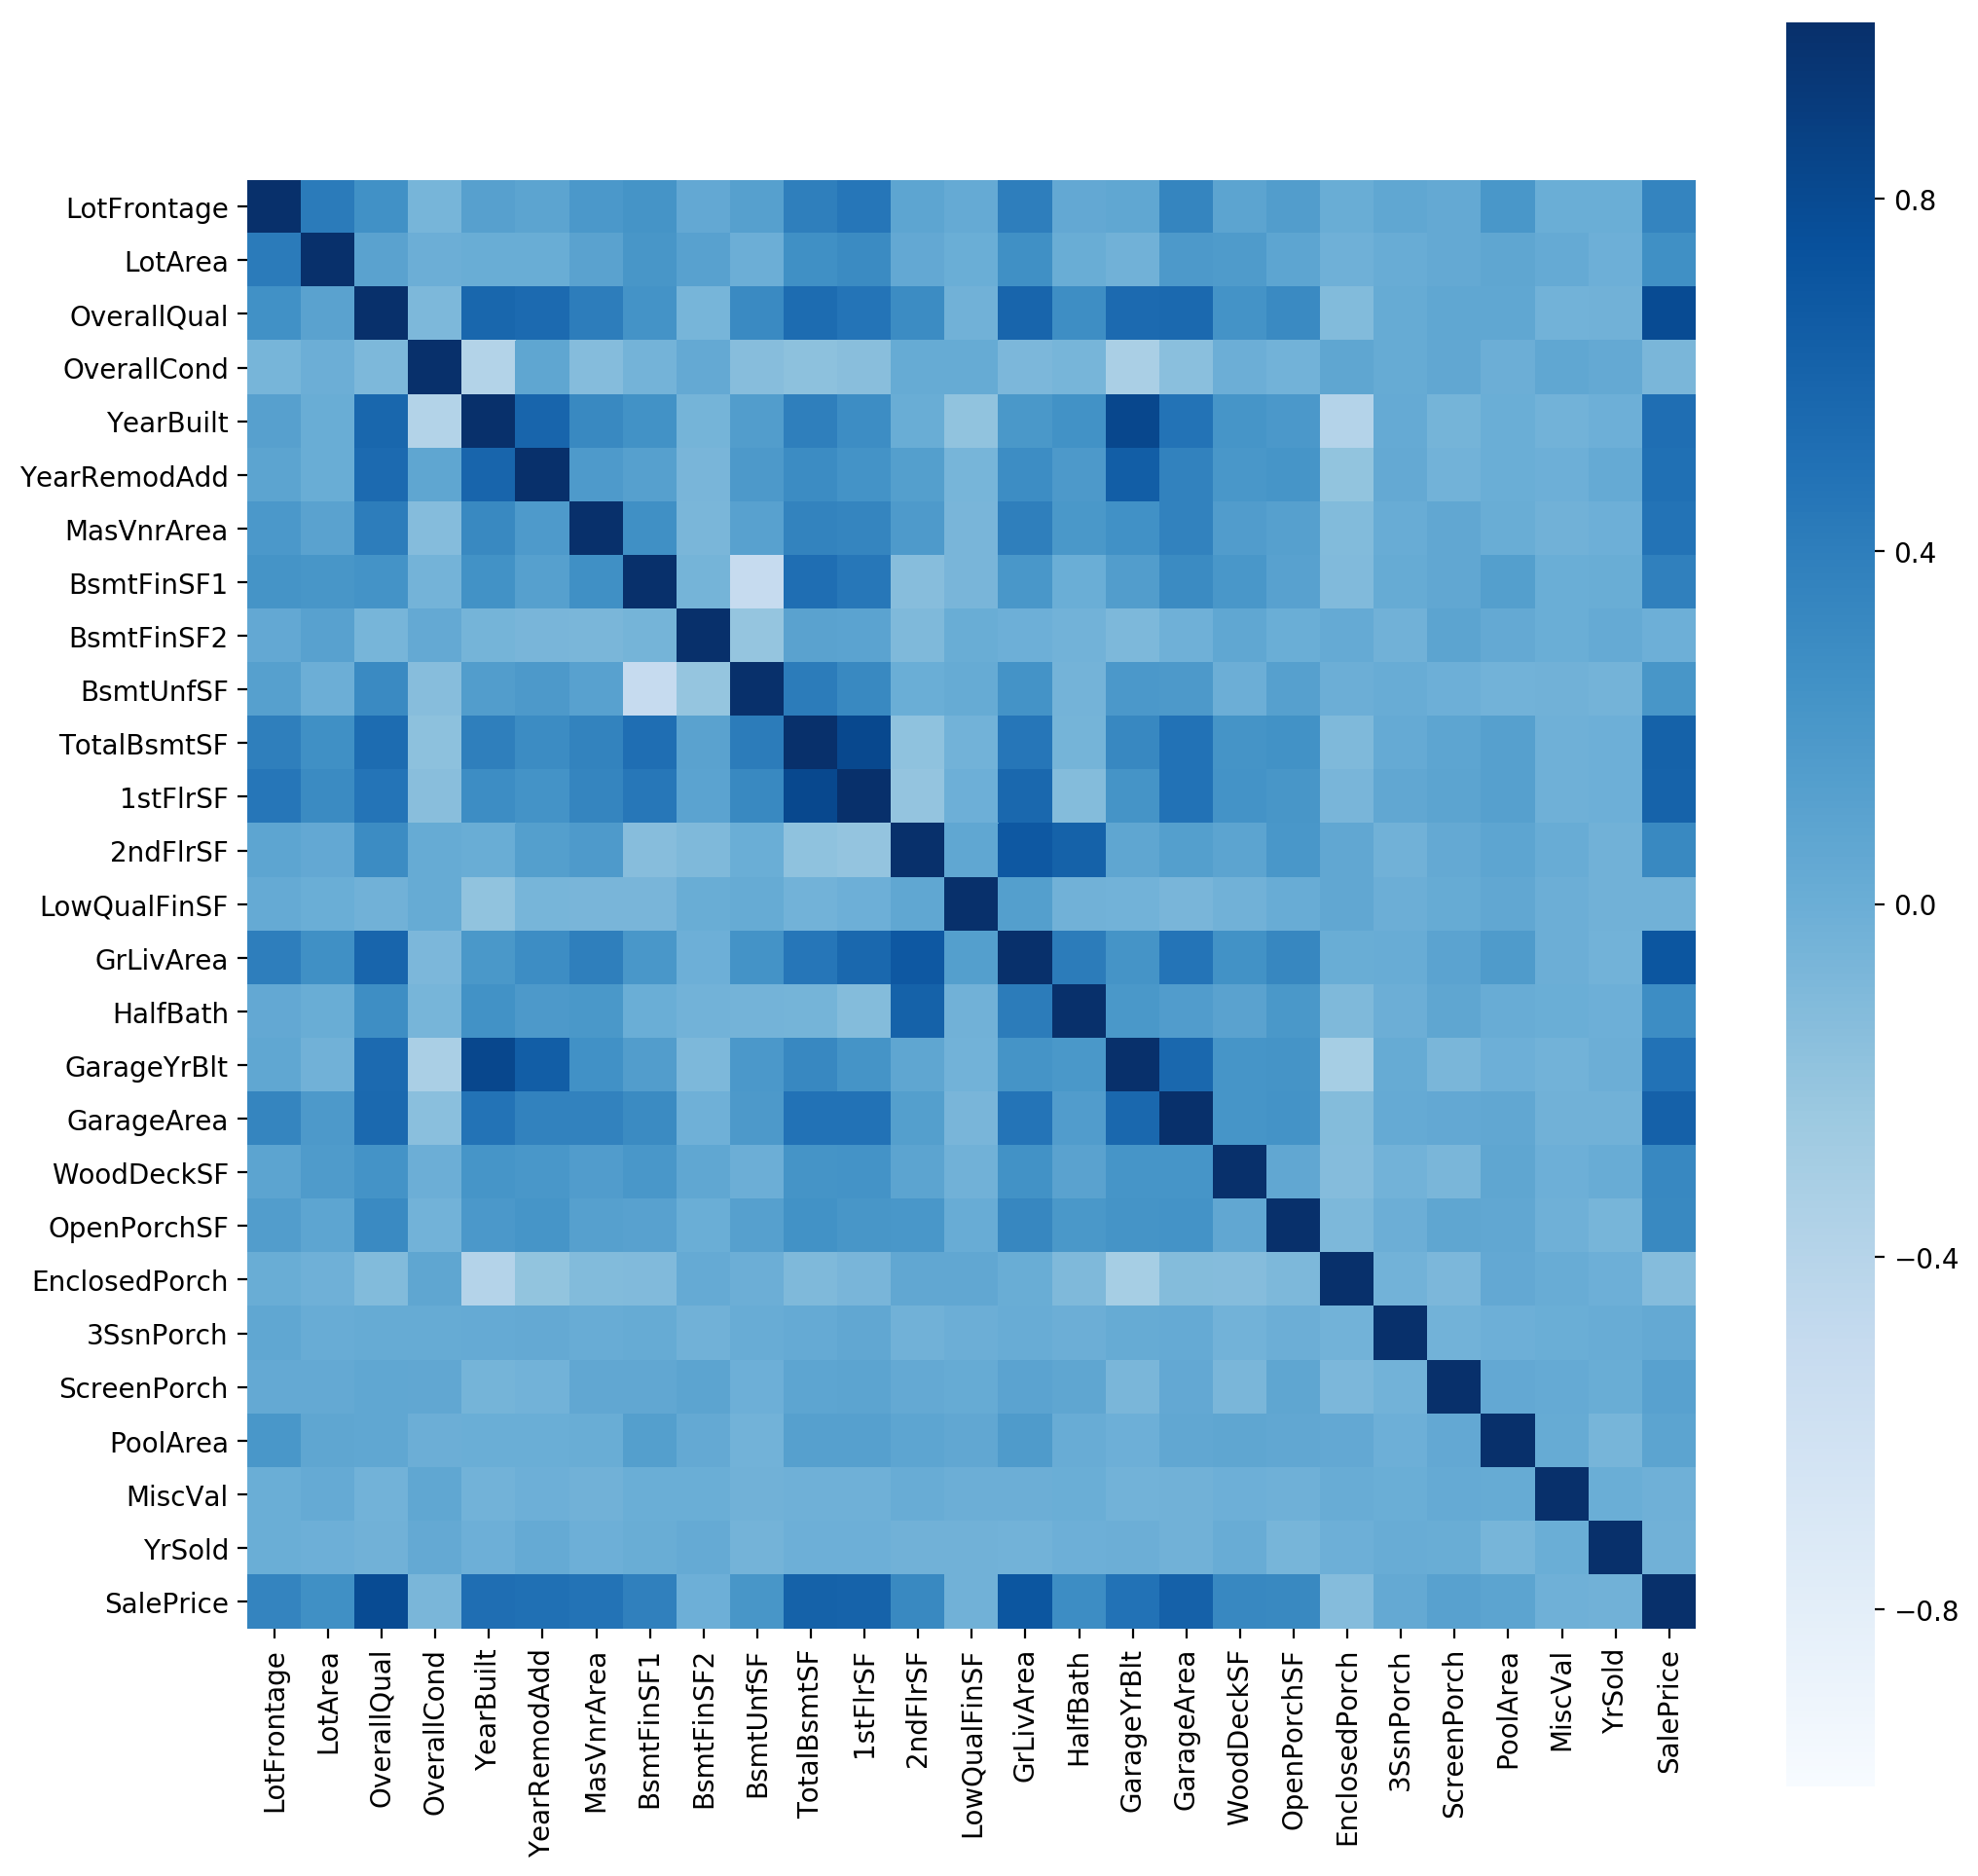

In [20]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( df_corr2,cmap="Blues",
             vmin=-1,
             vmax=1,
             square=True)
plt.show()

In [21]:
df3_index = df_corr2['SalePrice'][abs(df_corr2['SalePrice'])>0.5].index
df_corr3 = df[df3_index].corr()
df_corr3

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.468997,0.708624
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,1.000000,0.623431
SalePrice,0.790982,0.522897,0.507101,0.613581,0.605852,0.708624,0.623431,1.000000


針對對價格相關係數絕對值大於0.5的欄位進行考慮

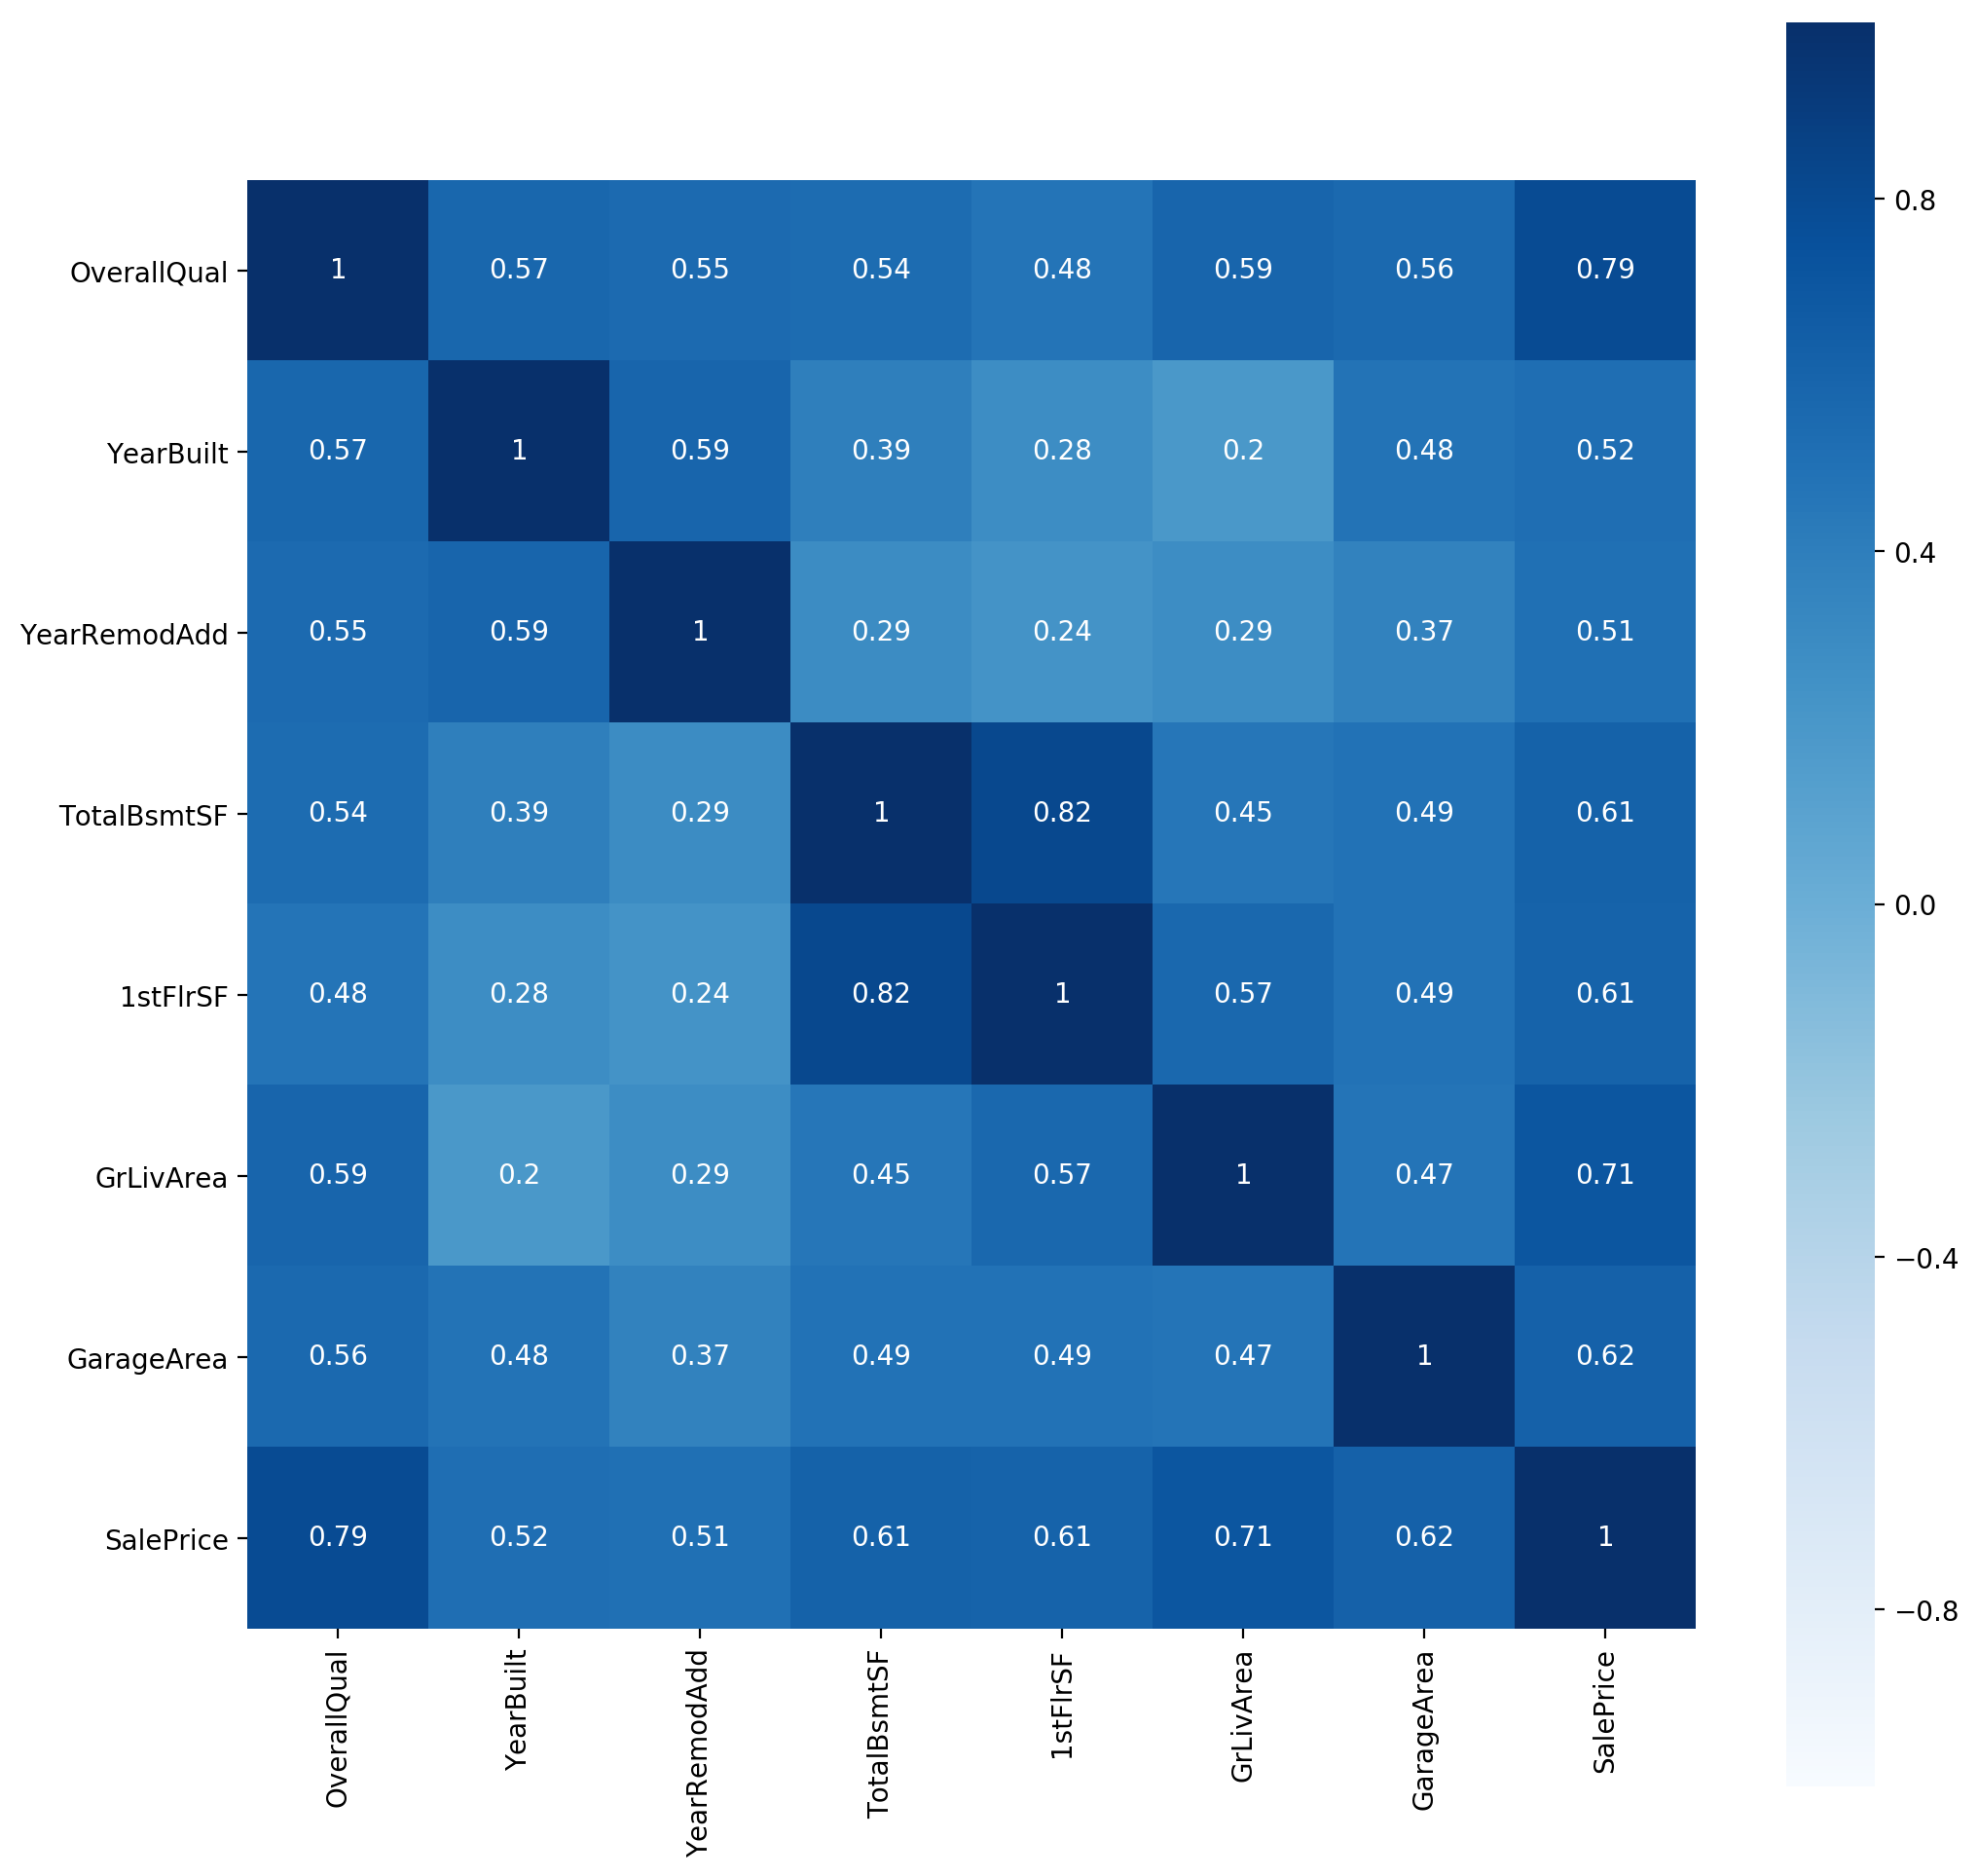

In [22]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( df_corr3,cmap="Blues",
             vmin=-1,
             vmax=1,
             square=True,
             annot=True)
plt.show()

針對連續數值型且相關性較高之欄位作圖(不選擇離散型資料作圖，如:房間數)

<Figure size 4000x2400 with 0 Axes>

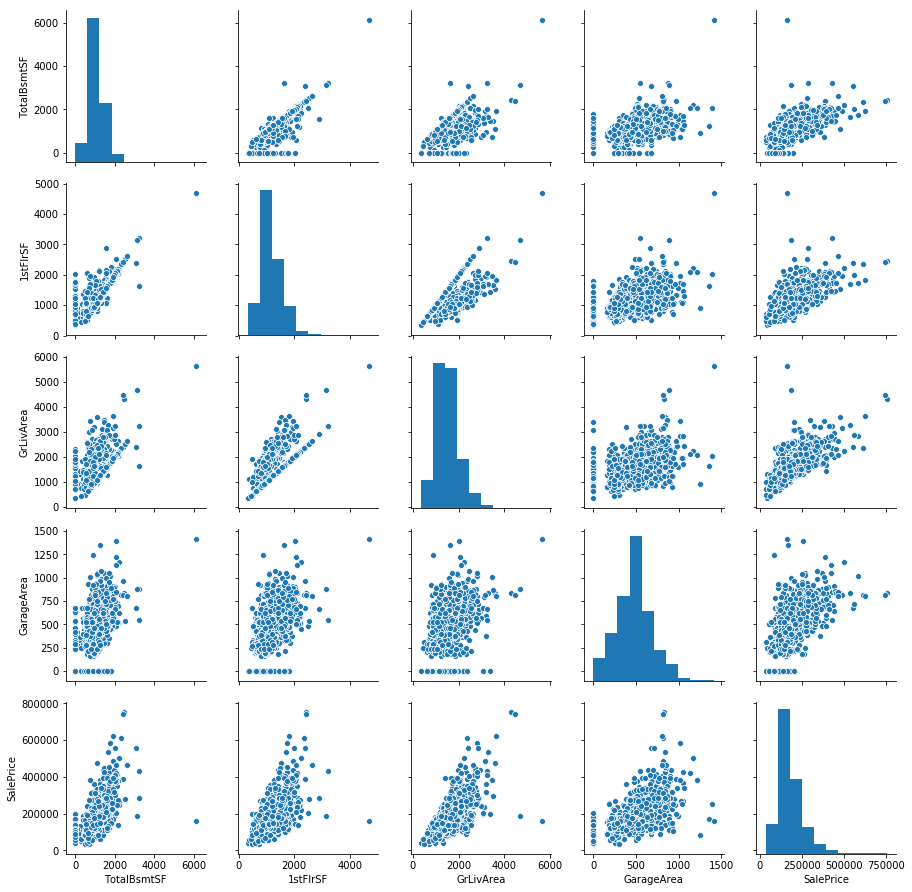

In [23]:
plt.figure(figsize=(20,12), dpi=200)

F = ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=F)
plt.show()

In [24]:
# train 數值型資料含空值
numeric_type = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'HalfBath', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice']

data_describe1.loc[numeric_type,:][data_describe1.loc[numeric_type,'is_null']==True]

,duplicate,is_null,null_number,null_rate(%),type
LotFrontage,111,True,259,17.74,numeric
MasVnrArea,328,True,8,0.55,numeric
GarageYrBlt,98,True,81,5.55,numeric
